In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import preprocessing

In [3]:
fraudcheck=pd.read_csv('Fraud_Check.csv')
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraudcheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [5]:
fraudcheck.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [20]:
fraudcheck=fraudcheck.rename({'Marital.Status':'Marital status','Taxable.Income':'Taxable income','City.Population':'population','Work.Experience':'Experience'},axis=1)

C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


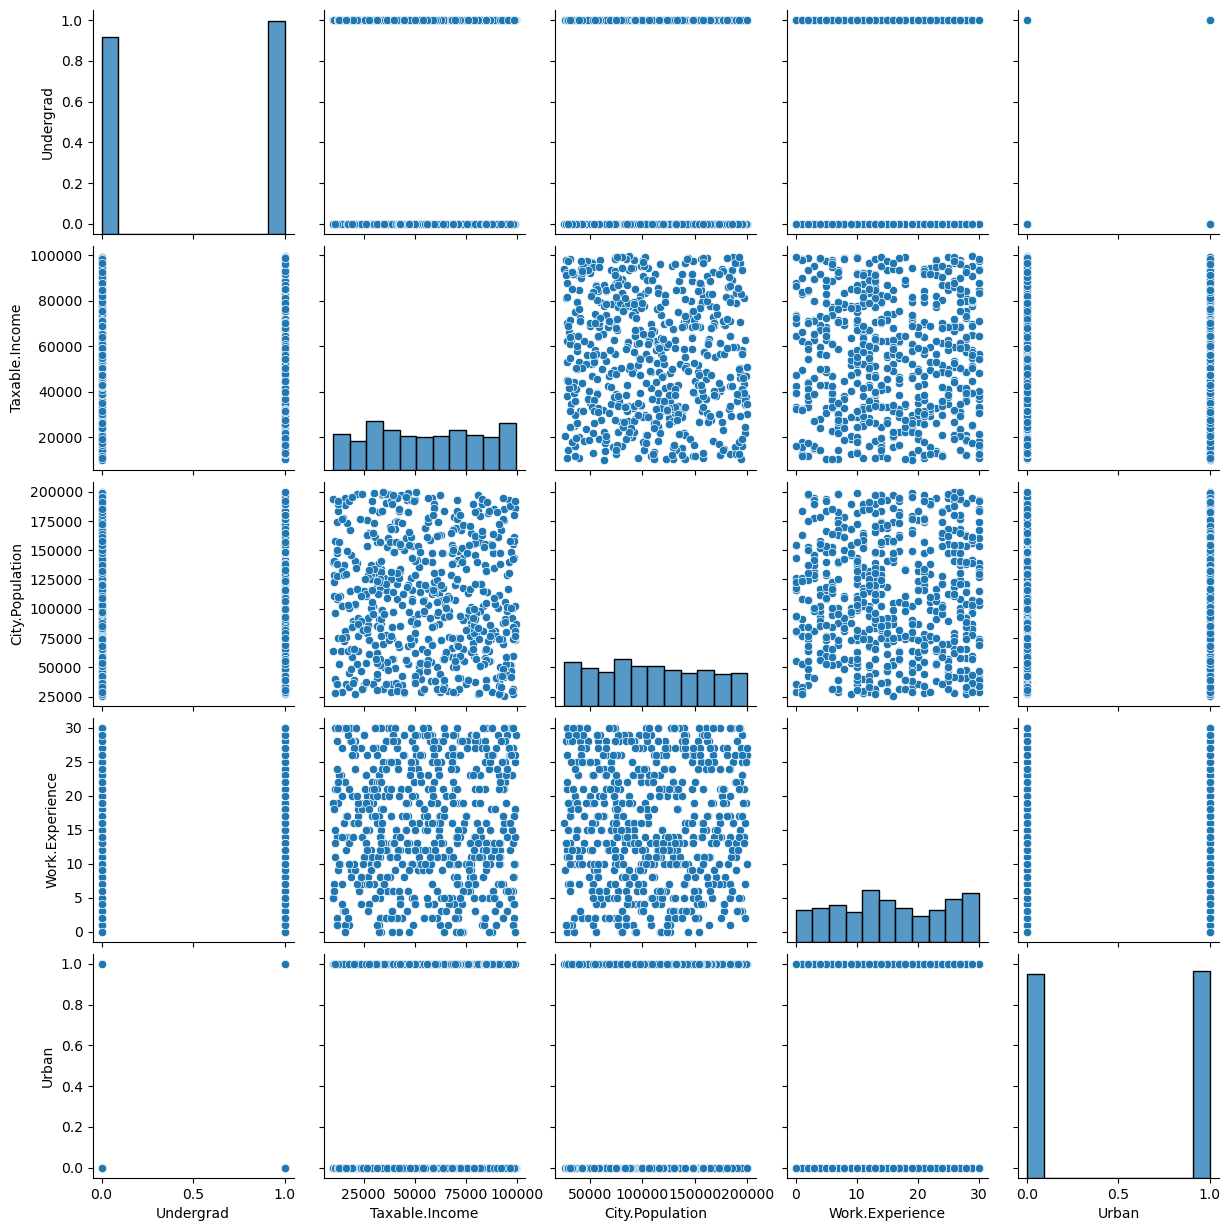

In [16]:
sns.pairplot(fraudcheck)

In [17]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [21]:
le=preprocessing.LabelEncoder()
fraudcheck['Undergrad']=le.fit_transform(fraudcheck['Undergrad'])
#fraudcheck['Marital status']=le.fit_transform(fraudcheck['Marital status'])
fraudcheck['Urban']=le.fit_transform(fraudcheck['Urban'])

In [53]:
fraudcheck=fraudcheck.drop(['Marital status'],axis=1)

In [24]:
x=fraudcheck.iloc[:,0:6]
y=fraudcheck['Taxable income']

In [54]:
fraudcheck.describe()

,Undergrad,population,Experience,Urban,tax
count,600.000000,6.000000e+02,6.000000e+02,600.000000,600.000000
mean,0.520000,1.776357e-17,-2.960595e-17,0.503333,0.206667
std,0.500017,1.000834e+00,1.000834e+00,0.500406,0.405252
min,0.000000,-1.665747e+00,-1.761033e+00,0.000000,0.000000
25%,0.000000,-8.388248e-01,-8.555207e-01,0.000000,0.000000
50%,1.000000,-4.525066e-02,-6.319723e-02,1.000000,0.000000
75%,1.000000,8.305183e-01,9.555043e-01,1.000000,0.000000
max,1.000000,1.827612e+00,1.634639e+00,1.000000,1.000000


In [34]:
#fraudcheck.insert(6,'tax'," ")
pd.options.mode.copy_on_write = True

for i in range(0,len(fraudcheck['Taxable income']),1):
    if fraudcheck['Taxable income'].iloc[i]<=30000:
        fraudcheck['tax'].iloc[i]='Risky'
    else:
        fraudcheck['tax'].iloc[i]='Good'

C:\Users\MD SUFIYA\AppData\Local\Temp\ipykernel_46544\3018250257.py:8: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment.
When using the Copy-on-Write mode, such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy.

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudcheck['tax'].iloc[i]='Good'
C:\Users\MD SUFIYA\AppData\Local\Temp\ipykernel_46544\3018250257.py:6: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment.
When using the Copy-on-Write mode, such chained assignment never works to update the original DataFrame or Series, because the intermediate obje

In [40]:
fraudcheck=fraudcheck.drop('tax_class',axis=1)

In [37]:
fraudcheck['tax']=le.fit_transform(fraudcheck['tax'])

In [42]:
fraudcheck=fraudcheck.drop('Taxable income',axis=1)

In [55]:
fraudcheck.head()

,Undergrad,population,Experience,Urban,tax
0,0,-1.178521,-0.629143,1,0
1,1,0.508500,0.276370,1,0
2,0,1.033109,1.634639,1,0
3,1,1.696831,-0.063197,1,0
4,0,-1.630532,1.408261,0,0


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing
fraudcheck.iloc[:,2:4]=StandardScaler().fit_transform(fraudcheck.iloc[:,2:4])
fraudcheck

,Undergrad,Marital status,population,Experience,Urban,tax
0,0,Single,-1.178521,-0.629143,1,0
1,1,Divorced,0.508500,0.276370,1,0
2,0,Married,1.033109,1.634639,1,0
3,1,Single,1.696831,-0.063197,1,0
4,0,Married,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,Divorced,-1.390432,-0.968710,1,0
596,1,Divorced,-1.071672,-1.534655,1,0
597,0,Divorced,0.909696,-1.761033,1,0
598,1,Married,1.432197,0.163181,0,0


array([[<Axes: title={'center': 'Undergrad'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Urban'}>],
       [<Axes: title={'center': 'tax'}>, <Axes: >]], dtype=object)

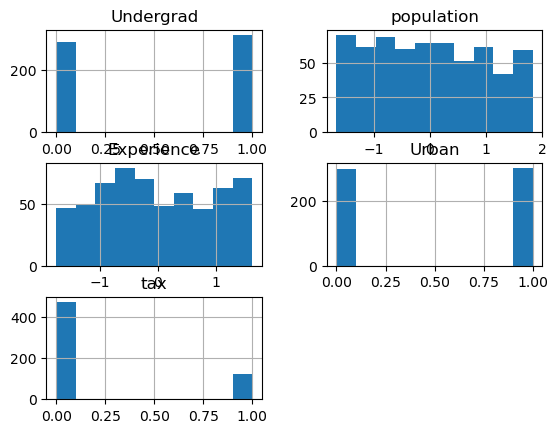

In [56]:
fraudcheck.hist()

In [57]:
x=fraudcheck.iloc[:,0:4]
y=fraudcheck['tax']
y.value_counts()

tax
0    476
1    124
Name: count, dtype: int64

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier 

In [60]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

pred=model.predict(x_test)
accuracy = np.mean(y_test==pred)
accuracy

0.7333333333333333

# Using Grid Search Optimization

In [62]:
modela=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modela.fit(x,y)

pred=modela.predict(x)
accuracy= np.mean(y==pred)
accuracy

0.7983333333333333